# Exploratory Data Anaylsis

With the cleaned data, we examine some preliminary relationships between the price of wheat and factors such as temperature, precipitation, and the price of a substitute product. 

In [23]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

To do our early data analysis, we first want to import all of our data, and start analyzing where all of the datasets begin to have data (in this case, January 1991 - Dec 2010)

In [25]:
corn_price_df=pd.read_csv("../cleaned_data/cornpricedf.csv")
corn_price_df=corn_price_df.set_index(['year','month']).reset_index()
del corn_price_df['Unnamed: 0']
corn_price_df=corn_price_df[2:-58].set_index(['year']).reset_index()
corn_price_df.columns=['Year','Month','Corn_Price','CP_Change']
corn_price_df.tail()

,Year,Month,Corn_Price,CP_Change
235,2010,Aug,175.60,7.13%
236,2010,Sep,205.84,17.22%
237,2010,Oct,235.70,14.51%
238,2010,Nov,238.24,1.08%
239,2010,Dec,250.63,5.20%


In [26]:
inflation_df=pd.read_csv("../cleaned_data/inflationdf.csv")
del inflation_df["Unnamed: 0"]
inflation_df=inflation_df[1:-5].set_index(['Year']).reset_index()
inflation_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,1991,0.60,0.15,0.15,0.15,0.30,0.29,0.15,0.29,0.44,0.15,0.29,0.07
1,1992,0.15,0.36,0.51,0.14,0.14,0.36,0.21,0.28,0.28,0.35,0.14,-0.07
2,1993,0.49,0.35,0.35,0.28,0.14,0.14,0.00,0.28,0.21,0.41,0.07,0.00
3,1994,0.27,0.34,0.34,0.14,0.07,0.34,0.27,0.40,0.27,0.07,0.13,0.00
4,1995,0.40,0.40,0.33,0.33,0.20,0.20,0.00,0.26,0.20,0.33,-0.07,-0.07


In [27]:
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12}
rev_months={v: k for k, v in months.items()}
new_inf=[]
for i in np.arange(len(inflation_df.index)):
    for col in inflation_df:
        if col!='Year':
            d={}
            inf_year_month=inflation_df[['Year',col]]
            d['Inflation']=inflation_df[col][i]
            d['Month']=months[col]
            d['Year']=inflation_df['Year'][i]
            new_inf.append(d)
new_inf=pd.DataFrame(new_inf)
new_inf=new_inf.sort(['Year','Month']).set_index(['Year','Month']).reset_index()
for i in np.arange(len(new_inf.index)):
    new_inf['Month'][i]=rev_months[new_inf['Month'][i]]
new_inf.tail()

/Users/Daniel/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Year,Month,Inflation
235,2010,Aug,0.14
236,2010,Sept,0.06
237,2010,Oct,0.12
238,2010,Nov,0.04
239,2010,Dec,0.17


In [28]:
prec_df=pd.read_csv("../cleaned_data/precdf.csv")
del prec_df['Unnamed: 0']
prec_df=prec_df[prec_df['Year'] >= 1991].set_index(['State']).reset_index()
prec_df.head()

,State,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,AK,1991,7.784103,8.979402,6.744274,6.920513,7.116752,4.326667,8.705983,10.838889,16.443077,10.978205,11.388889,14.869231
1,AK,1992,12.362414,7.967500,9.445948,4.339138,6.526983,6.186293,7.515603,11.058362,10.815603,11.070690,14.462069,9.077845
2,AK,1993,9.887759,9.061897,5.848621,4.473190,4.791552,4.213190,4.102155,11.267414,15.410603,12.848448,13.185603,13.051552
3,AK,1994,8.470609,3.785130,9.882522,5.583304,8.056957,6.289826,6.036435,5.966957,13.989913,13.792609,11.736174,10.987391
4,AK,1995,7.123391,6.137565,5.789217,5.220609,7.546870,6.379043,8.656957,8.091478,16.222783,10.711130,6.080000,7.904696


In [29]:
prec_by_year=prec_df.sort(['Year']).set_index(['Year']).reset_index()

In [30]:
new_prec=[]
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
rev_months={v: k for k, v in months.items()}
#first separate each into each year
for year in prec_by_year['Year'].unique():
    prec_year=prec_by_year[prec_by_year['Year']==year].set_index(['State']).reset_index()
    #then focus on each month in that year
    for col in prec_year:
        if (col!='Year') & (col!='State'):
            d={}
            prec_year_month=prec_year[['Year','State',col]]
            for i in np.arange(len(prec_year_month.index)):
                d[prec_year_month['State'][i]+'_P']=prec_year_month[col][i]
            d['Month']=months[col]
            d['Year']=prec_year['Year'][0]
            new_prec.append(d)
new_prec=pd.DataFrame(new_prec)
new_prec=new_prec.sort(['Year','Month']).set_index(['Year','Month']).reset_index()
for i in np.arange(len(new_prec.index)):
    new_prec['Month'][i]=rev_months[new_prec['Month'][i]]
new_prec.tail()

/Users/Daniel/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Year,Month,AK_P,AL_P,AR_P,AS_P,AZ_P,CA_P,CO_P,CT_P,DE_P,FL_P,FM_P,GA_P,GU_P,HI_P,IA_P,ID_P,IL_P,IN_P,KS_P,KY_P,LA_P,MA_P,MD_P,ME_P,MH_P,MI_P,MN_P,MO_P,MP_P,MS_P,MT_P,NC_P,ND_P,NE_P,NH_P,NJ_P,NM_P,NV_P,NY_P,OH_P,OK_P,OR_P,PA_P,PR_P,PW_P,RI_P,SC_P,SD_P,TN_P,TX_P,UM_P,UT_P,VA_P,VI_P,VT_P,WA_P,WI_P,WV_P,WY_P
235,2010,Aug,8.467807,12.590635,4.048849,23.000,5.097714,0.154019,5.547477,9.489394,7.42000,21.521552,39.456667,12.568478,30.94,5.193725,12.500536,1.721552,7.913393,4.904863,7.133959,8.674706,15.948788,10.701688,10.996667,7.027273,21.661667,5.881880,12.216500,6.708994,27.415,12.642791,5.228263,12.154465,5.984307,7.841792,9.7088,7.452593,5.518306,0.636832,10.696321,6.772903,4.472462,0.918010,7.689691,21.676615,30.745,7.85875,14.528387,5.555278,11.145196,2.953622,NaN,3.023273,11.723307,11.016154,10.200233,1.793631,11.388684,8.852021,2.478321
236,2010,Sep,7.563333,4.006587,9.230719,29.855,1.567029,0.345311,1.541651,6.511818,11.80500,13.001379,28.046667,8.700797,30.87,4.689608,13.890000,1.888707,9.253795,3.564178,9.608942,4.741471,3.795333,6.802597,13.516222,12.723636,27.813333,11.660301,18.118188,19.643017,33.690,2.701008,4.200339,17.943145,10.085474,6.265958,7.5162,8.778333,3.604536,0.481782,8.005130,5.420581,10.650955,4.859948,8.716134,19.187538,32.765,7.96000,12.788495,8.564861,5.376569,13.297660,NaN,0.640424,12.816299,11.433846,7.768140,8.741847,15.281263,6.842979,0.713511
237,2010,Oct,13.816842,7.338175,3.536331,34.375,3.359429,7.457321,2.801147,14.080909,12.32500,1.993276,34.766667,4.531304,34.39,8.255196,2.533571,4.700086,3.349777,2.943288,1.961092,4.207721,3.138727,15.714545,11.486444,15.779351,35.315000,5.126541,5.469000,1.969162,23.800,4.560930,1.753432,6.935283,2.952774,1.950208,18.9946,13.643148,2.204809,4.812277,16.613161,4.854839,4.397839,9.245026,13.113351,33.308615,27.085,11.23125,3.897527,2.735347,6.817451,2.172885,NaN,6.380485,9.053937,32.951538,22.463953,10.565987,5.744316,6.566702,2.296031
238,2010,Nov,11.817368,12.435317,10.462230,30.125,0.624400,7.024211,1.591560,8.416364,5.70625,5.089138,24.267333,6.412609,11.14,12.143333,4.250476,5.685690,7.913482,12.618836,4.021331,12.469485,13.648182,9.876364,5.899556,13.521948,39.618333,5.477519,3.892625,8.020950,13.140,14.509612,3.585636,4.837862,1.764015,2.026042,8.8522,5.659815,0.235246,2.414158,7.093782,10.810194,4.677739,13.803455,8.092835,17.109385,27.490,9.39875,3.677742,0.931319,14.451471,3.494407,NaN,3.592424,5.101102,19.686923,7.664419,13.865924,4.262947,7.572340,2.213969
239,2010,Dec,5.167719,5.390159,4.312014,34.920,4.350743,22.050742,2.855688,11.801818,6.59125,2.655517,21.963333,6.254855,9.25,22.453725,3.209583,8.206810,4.590893,4.177055,0.529761,7.764706,5.488424,10.428831,6.172222,15.461948,19.596667,3.512782,5.133000,2.563073,7.050,4.398140,2.823602,7.665472,3.237080,0.931083,10.7050,9.152407,1.802022,6.510792,8.770518,4.826323,2.114724,20.532461,8.613711,13.812308,24.390,10.38250,5.506129,2.543681,7.012843,2.510577,NaN,9.297818,7.802598,5.137692,9.818605,18.686943,4.568211,8.729149,2.350458


In [31]:
temp_df=pd.read_csv("../cleaned_data/tempdf.csv")
del temp_df['Unnamed: 0']
temp_df=temp_df[temp_df['Year'] >= 1991].set_index(['State']).reset_index()
temp_df.head()

,State,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,AK,1991,-10.583718,-11.246410,-6.500385,0.960833,6.976346,11.942628,13.007436,12.120256,7.666154,-0.397756,-9.403462,-11.432692
1,AK,1992,-10.756839,-11.020968,-8.385355,0.831161,6.282968,11.960323,13.717935,11.581484,6.680903,-0.369613,-7.542387,-11.508258
2,AK,1993,-14.467742,-9.947806,-4.899677,1.273032,7.734710,12.007290,14.657871,11.796129,6.451742,-1.658581,-7.437032,-10.763548
3,AK,1994,-12.222662,-8.087662,-8.451623,0.828377,6.866623,11.789675,14.334221,13.671623,8.025779,-2.250714,-7.441234,-11.586364
4,AK,1995,-12.445260,-8.367532,-6.563247,2.549675,7.728182,11.788766,13.526364,11.594935,8.864935,0.430714,-7.723701,-11.932468


In [32]:
temp_by_year=temp_df.sort(['Year']).set_index(['Year']).reset_index()
new_temp=[]
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov ':11,'Dec':12}
rev_months={v: k for k, v in months.items()}
#first separate each into each year
for year in temp_by_year['Year'].unique():
    temp_year=temp_by_year[temp_by_year['Year']==year].set_index(['State']).reset_index()
    #then focus on each month in that year
    for col in temp_year:
        if (col!='Year') & (col!='State'):
            d={}
            temp_year_month=temp_year[['Year','State',col]]
            for i in np.arange(len(temp_year_month.index)):
                d[temp_year_month['State'][i]+'_T']=temp_year_month[col][i]
            d['Month']=months[col]
            d['Year']=temp_year['Year'][0]
            new_temp.append(d)
new_temp=pd.DataFrame(new_temp)
new_temp=new_temp.sort(['Year','Month']).set_index(['Year','Month']).reset_index()
for i in np.arange(len(new_temp.index)):
    new_temp['Month'][i]=rev_months[new_temp['Month'][i]]
new_temp.tail()

/Users/Daniel/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Year,Month,AK_T,AL_T,AR_T,AS_T,AZ_T,CA_T,CO_T,CT_T,DE_T,FL_T,FM_T,GA_T,GU_T,HI_T,IA_T,ID_T,IL_T,IN_T,KS_T,KY_T,LA_T,MA_T,MD_T,ME_T,MH_T,MI_T,MN_T,MO_T,MP_T,MS_T,MT_T,NC_T,ND_T,NE_T,NH_T,NJ_T,NM_T,NV_T,NY_T,OH_T,OK_T,OR_T,PA_T,PR_T,PW_T,RI_T,SC_T,SD_T,TN_T,TX_T,UM_T,UT_T,VA_T,VI_T,VT_T,WA_T,WI_T,WV_T,WY_T
235,2010,Aug,11.933571,27.375402,28.346040,26.90,26.304813,22.444842,20.294057,21.429565,24.481111,28.127299,27.5125,26.941071,27.55,23.387347,24.051168,19.671397,24.938831,24.448137,27.370764,25.757027,28.722529,21.010508,24.160000,18.748125,28.050,21.104599,21.666603,26.492055,26.985,28.017500,19.282168,24.744855,21.360000,24.776937,18.96775,23.207111,22.531775,22.397281,20.362039,23.385242,28.99656,18.923989,21.930519,26.430000,27.95,21.82500,26.573765,23.609375,26.060513,28.966019,NaN,21.759571,23.870283,27.790,18.805135,18.821346,21.498875,22.704270,20.116336
236,2010,Sep,7.232857,24.158851,22.900594,27.15,25.245625,21.435072,16.561698,17.611304,20.846667,26.846350,27.6175,23.935089,27.35,23.409796,17.247883,13.930074,19.061364,19.142549,21.320255,21.072027,25.384253,17.347966,20.294375,14.146406,27.650,14.933577,13.821731,20.080342,25.850,24.331818,11.820664,21.703696,12.426885,17.849937,14.79275,19.397333,20.167574,18.824737,16.111645,18.505242,23.35384,14.299415,17.490593,26.273871,28.40,18.53375,23.807529,15.090347,21.624103,24.928102,NaN,18.107975,20.351132,27.024,14.642432,13.669872,14.532875,18.314607,14.178168
237,2010,Oct,0.217208,18.919885,18.028515,27.50,17.734063,16.300086,9.449670,10.973043,14.538889,24.197299,27.5425,18.868750,27.65,22.968571,12.538613,8.872059,14.158961,13.892745,15.764777,15.602838,20.715862,10.511186,14.070208,7.098125,27.500,9.804599,9.380513,15.446027,26.145,19.299318,8.347080,15.971667,8.281230,12.436375,7.68300,12.922667,13.624320,11.583158,9.521711,12.861855,18.02144,10.199202,11.417778,25.587097,27.95,12.05500,18.339647,10.174583,16.205299,20.644653,NaN,10.259632,14.314717,26.470,7.242973,9.500962,10.047500,12.649551,8.436412
238,2010,Nov,-5.690325,12.390575,11.199505,27.20,10.530188,11.200344,1.761085,5.391739,8.502222,19.274453,27.5800,12.360804,28.35,21.983673,4.119270,1.428897,7.271364,7.132745,7.404586,8.837162,14.972644,5.333729,7.933958,2.144375,27.400,3.496277,0.560128,8.769178,26.090,12.952500,-1.154336,9.735435,-1.198443,3.404437,2.69100,7.160222,6.481302,4.296228,4.125658,6.560806,10.76392,5.232340,5.806741,24.064194,28.30,6.82625,11.738824,0.804861,9.621538,14.797477,NaN,2.420982,8.226038,25.214,2.049730,4.861282,2.209125,6.580449,-1.195878
239,2010,Dec,-12.815390,5.431149,1.966832,27.65,8.538187,9.013954,-3.263443,-2.268261,0.196667,14.550803,27.7000,5.573304,28.30,20.846531,-10.293577,-5.204632,-6.301429,-5.362549,-3.441720,-1.855541,8.623563,-2.184407,-0.587500,-6.008750,27.575,-6.925912,-14.874487,-4.037123,25.750,5.812841,-11.784690,1.871522,-16.097869,-7.858000,-5.70525,-0.683556,2.749231,1.764912,-4.665329,-4.480484,0.93136,0.755106,-3.241481,23.175806,28.15,-0.52750,4.923176,-11.951736,0.386068,7.508333,NaN,-1.452147,-0.292925,24.774,-7.088649,-0.802179,-11.064625,-3.244494,-8.811069


In [33]:
wheat_price_df=pd.read_csv("../cleaned_data/wheatprice_df.csv")
wheat_price_df=wheat_price_df.set_index(['year','month']).reset_index()
del wheat_price_df['Unnamed: 0']
wheat_price_df=wheat_price_df[2:-58].set_index(['year']).reset_index()
wheat_price_df.columns=['Year','Month', 'Wheat_Price', 'WP_%_Change']
wheat_price_df.tail()

,Year,Month,Wheat_Price,WP_%_Change
235,2010,Aug,246.25,25.75%
236,2010,Sep,271.69,10.33%
237,2010,Oct,270.23,-0.54%
238,2010,Nov,274.08,1.42%
239,2010,Dec,306.53,11.84%


In [34]:
del new_inf['Year']
del new_inf['Month']
del new_prec['Year']
del new_prec['Month']
del new_temp['Year']
del new_temp['Month']
del wheat_price_df['Year']
del wheat_price_df['Month']

In [35]:
dftouse=pd.concat([corn_price_df, new_inf, new_prec, new_temp, wheat_price_df], axis=1)
dftouse.columns

Index([u'Year', u'Month', u'Corn_Price', u'CP_Change', u'Inflation', u'AK_P', u'AL_P', u'AR_P', u'AS_P', u'AZ_P', 
       ...
       u'UT_T', u'VA_T', u'VI_T', u'VT_T', u'WA_T', u'WI_T', u'WV_T', u'WY_T', u'Wheat_Price', u'WP_%_Change'], dtype='object', length=125)

In [36]:
dftouse.to_csv('../cleaned_data/dftouse.csv')

We next generate graphs relating each variable, excluding temperature and precipitation, to Wheat Price. Hopefully we will be able to see some correlation in a few factors, which we will be able to use in our model. We will also skip month for now because they repeat, so a scatter plot would be more appropriate. We also need to clean the percent change of wheat and corn a little more to be able to plot it.

In [38]:
dftouse['CP_Change']=dftouse['CP_Change'].map(lambda x: x.rstrip("%"))
dftouse['CP_Change']=dftouse['CP_Change'].map(lambda x: float(x))
dftouse['WP_%_Change']=dftouse['WP_%_Change'].map(lambda x: x.rstrip("%"))
dftouse['WP_%_Change']=dftouse['WP_%_Change'].map(lambda x: float(x))

In [39]:
cols=[]
for col in dftouse:
    if ('_T' not in col) & ('_P' not in col) & (col!='Month'):
        cols.append(col)

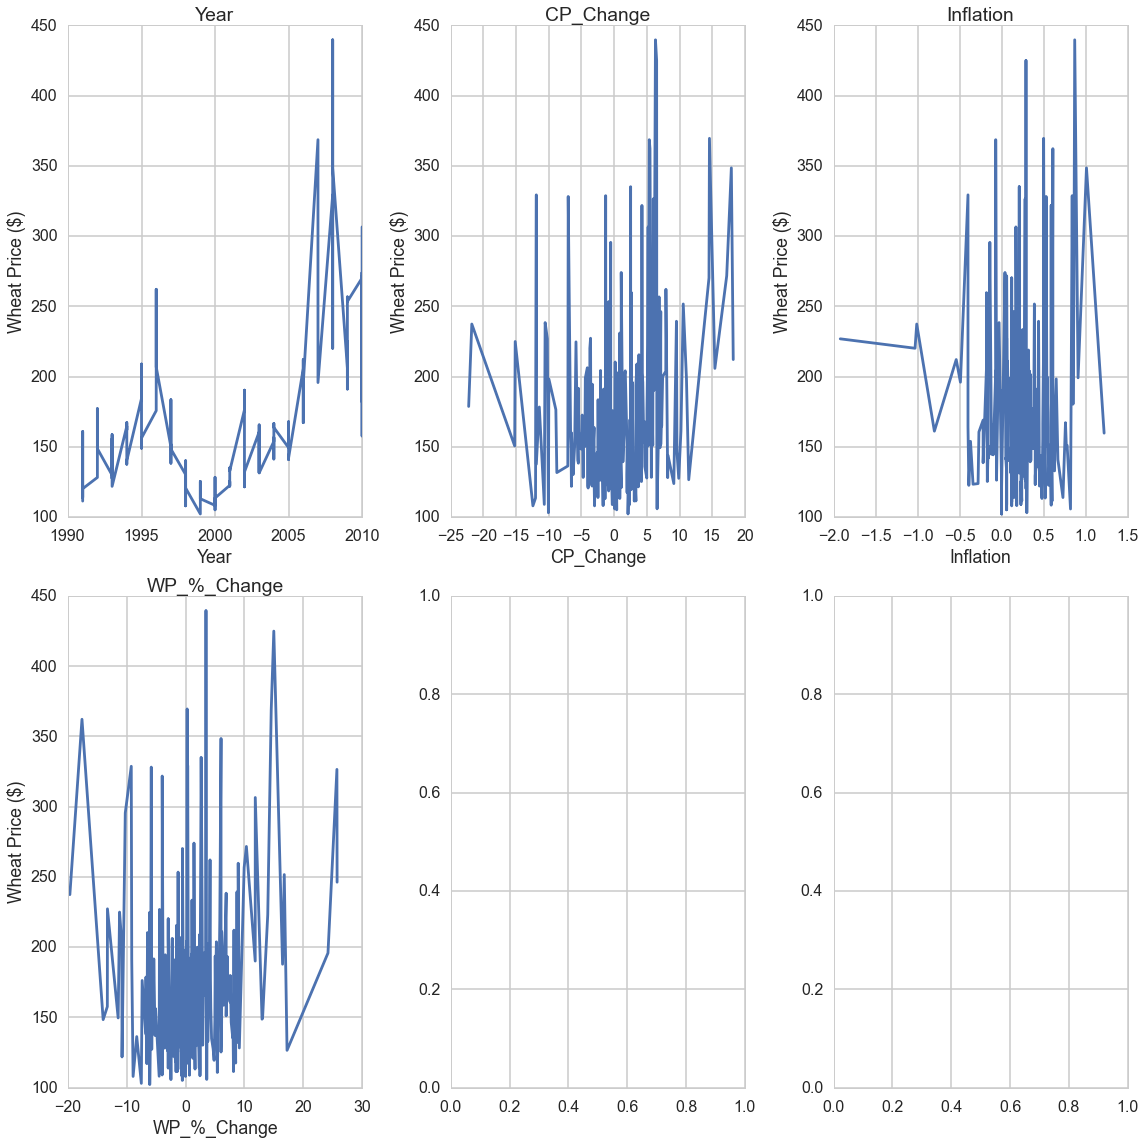

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 16), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), cols):
    dftograph=dftouse.sort([p]).set_index(p).reset_index()
    ax.plot(dftograph[p], dftograph['Wheat_Price'], label=p)
    ax.set_title(p)
    ax.set_ylabel('Wheat Price ($)')
    ax.set_xlabel(p)

Now we want to use scatter plots to examine the relationship between Wheat Price and Precipitation. First we look at the relationship between Wheat Price and Precipitation at a monthly level. Specifically, we look at the 5 states with largest wheat production (Kansas, North Dakota, Montana, Washington, Idaho) individually first, and then we look at the average of all states in dftouse. 

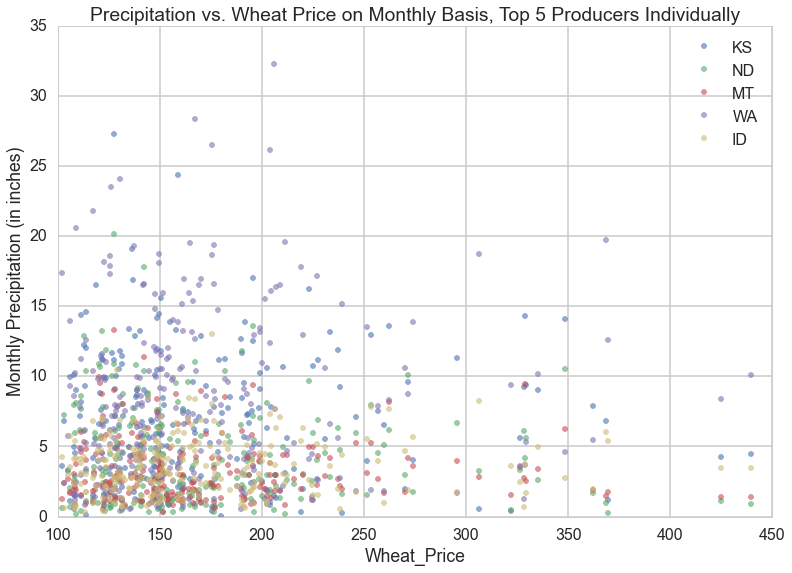

In [43]:
#Top 5 wheat producers, individually 
plt.xlabel('Wheat_Price')
plt.ylabel('Monthly Precipitation (in inches)')
plt.plot(dftouse['Wheat_Price'],dftouse["KS_P"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["ND_P"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["MT_P"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["WA_P"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["ID_P"], '.', alpha=.6)
states = ['KS','ND','MT','WA','ID']
plt.legend(states)
plt.title('Precipitation vs. Wheat Price on Monthly Basis, Top 5 Producers Individually')

We now average these top 5 producers for a clearer visualization. 

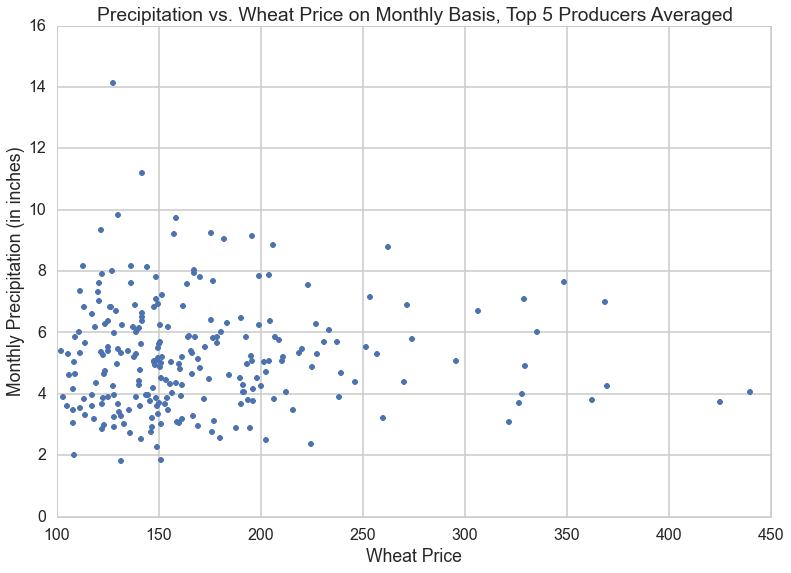

In [44]:
#Top 5 producers averaged
plt.plot(dftouse['Wheat_Price'],dftouse[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),'.')
plt.xlabel('Wheat Price')
plt.ylabel('Monthly Precipitation (in inches)')
plt.title('Precipitation vs. Wheat Price on Monthly Basis, Top 5 Producers Averaged')

We then examine the correlation between precipitation and wheat price for the same 5 states, but only for March through October, which is growing season through harvest.

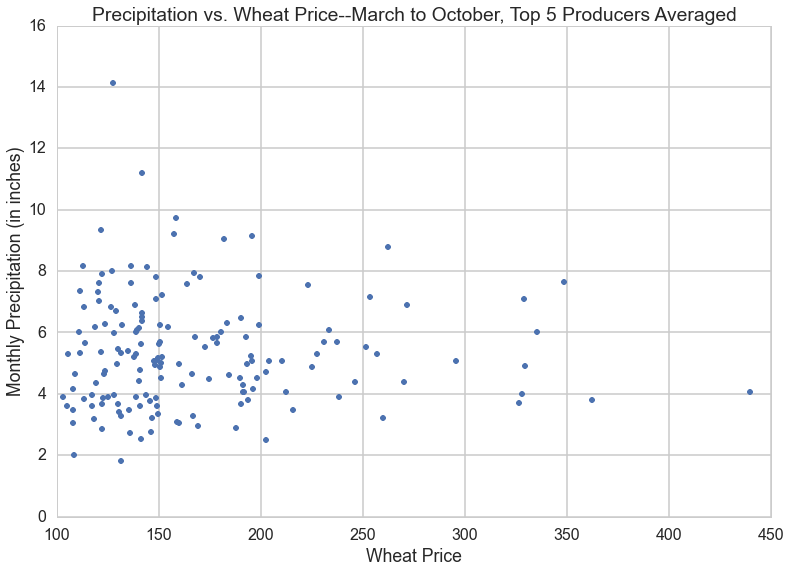

In [45]:
#Top 5 producers averaged, March through October 
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
dftouse_Mar_to_Oct = dftouse.loc[dftouse['Month'].isin(months)]
plt.plot(dftouse_Mar_to_Oct['Wheat_Price'],dftouse_Mar_to_Oct[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),'.')
plt.xlabel('Wheat Price')
plt.ylabel('Monthly Precipitation (in inches)')
plt.title('Precipitation vs. Wheat Price--March to October, Top 5 Producers Averaged')

Now we visualize the same five states for wheat price vs. precipitation, but at an annual scale. We hope that less resolution might make seeing trends easier. 

In [47]:
dftouse_year = dftouse.groupby(['Year']).mean().reset_index()

/Users/Daniel/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


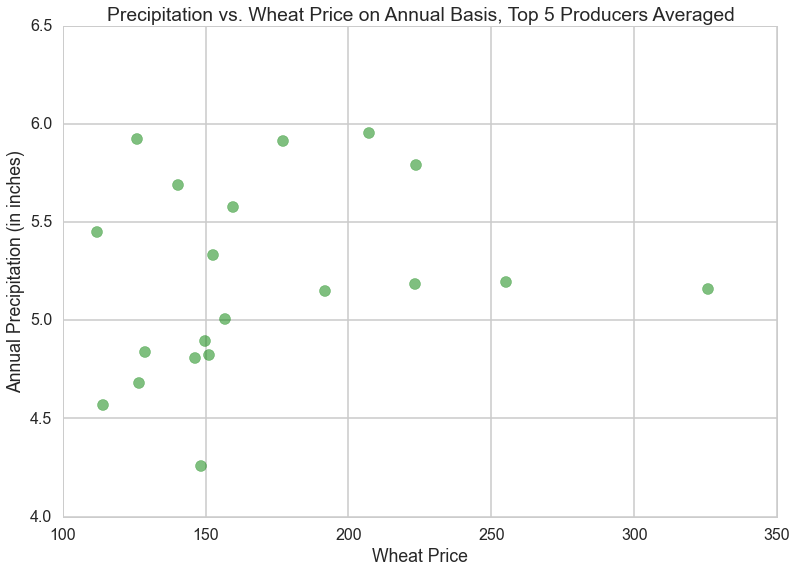

In [48]:
plt.scatter(dftouse_year['Wheat_Price'],dftouse_year[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),s=120,alpha=.5,color='g')
plt.xlabel('Wheat Price')
plt.ylabel('Annual Precipitation (in inches)')
plt.title('Precipitation vs. Wheat Price on Annual Basis, Top 5 Producers Averaged')

Now we want to use scatter plots to examine the relationship between Wheat Price and Temperature. First we look at the relationship between Wheat Price and Temperature at a monthly level. Specifically, we look at the 5 states with largest wheat production (Kansas, North Dakota, Montana, Washington, Idaho) individually first, and then we look at the average of all states in dftouse. 

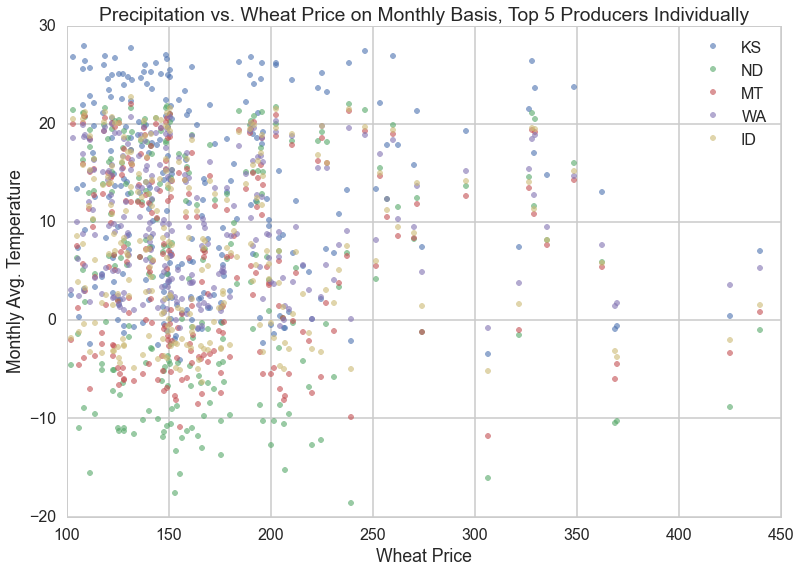

In [49]:
#Top 5 wheat producers, individually 
plt.xlabel('Wheat Price')
plt.ylabel('Monthly Avg. Temperature')
plt.plot(dftouse['Wheat_Price'],dftouse["KS_T"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["ND_T"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["MT_T"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["WA_T"], '.', alpha=.6)
plt.plot(dftouse['Wheat_Price'],dftouse["ID_T"], '.', alpha=.6)
states = ['KS','ND','MT','WA','ID']
plt.legend(states)
plt.title('Precipitation vs. Wheat Price on Monthly Basis, Top 5 Producers Individually')

We now average these top 5 producers for a clearer visualization.

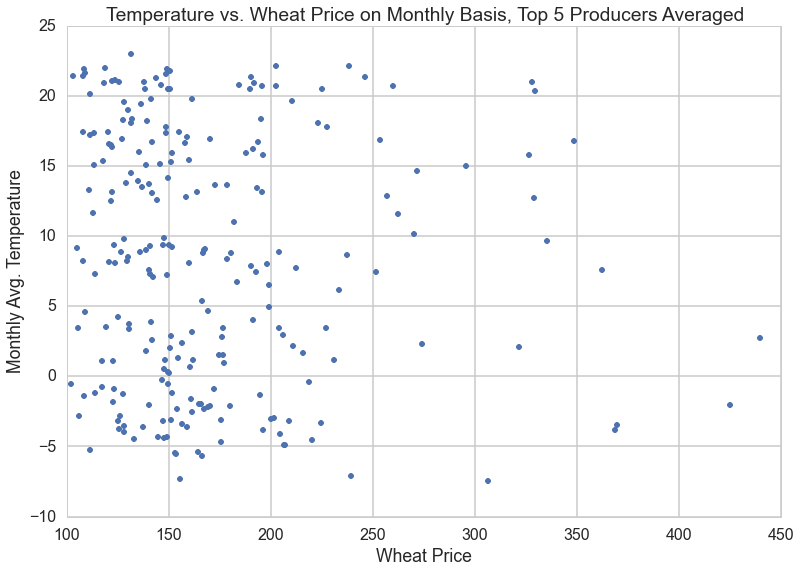

In [50]:
#Top 5 producers averaged
plt.plot(dftouse['Wheat_Price'],dftouse[["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),'.')
plt.xlabel('Wheat Price')
plt.ylabel('Monthly Avg. Temperature')
plt.title('Temperature vs. Wheat Price on Monthly Basis, Top 5 Producers Averaged')

We then examine the correlation between temperature and wheat price for the same 5 states, but only for March through October, which is growing season through harvest.

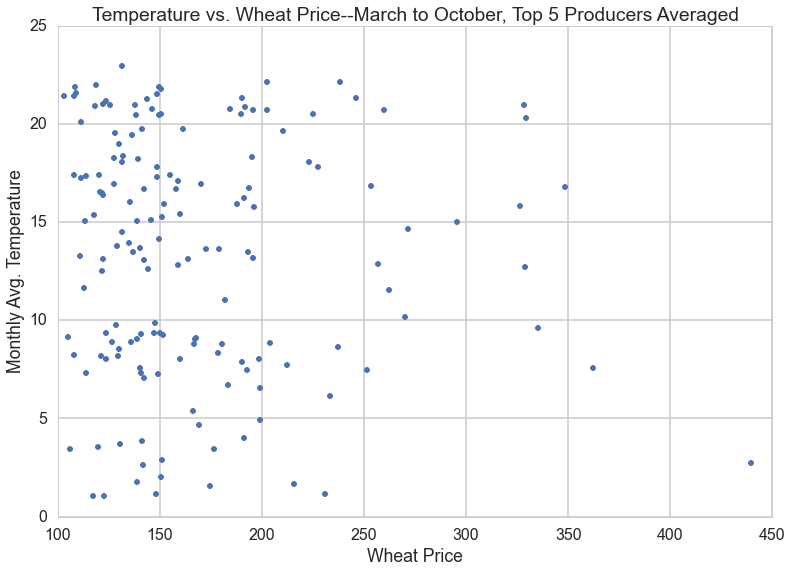

In [51]:
#Top 5 producers averaged, March through October 
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
dftouse_Mar_to_Oct = dftouse.loc[dftouse['Month'].isin(months)]
plt.plot(dftouse_Mar_to_Oct['Wheat_Price'],dftouse_Mar_to_Oct[["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),'.')
plt.xlabel('Wheat Price')
plt.ylabel('Monthly Avg. Temperature')
plt.title('Temperature vs. Wheat Price--March to October, Top 5 Producers Averaged')

Now we visualize the same five states for wheat price vs. temperature, but at an annual scale. We hope that less resolution might make seeing trends easier.

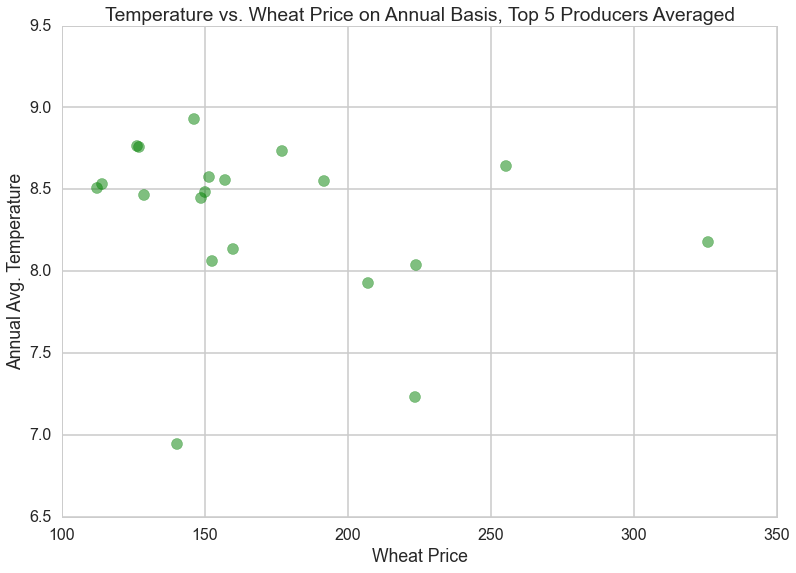

In [52]:
plt.scatter(dftouse_year['Wheat_Price'],dftouse_year[["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),s=120,alpha=.5,color='g')
plt.xlabel('Wheat Price')
plt.ylabel('Annual Avg. Temperature')
plt.title('Temperature vs. Wheat Price on Annual Basis, Top 5 Producers Averaged')